In [1]:
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
import os
DRIVE = '/gdrive'
WRK_DIR = DRIVE + '/MyDrive/Colab Notebooks/(Step 2) Normalized Images -> Unsupervised Features -> Conventional Classification'

drive.mount('/gdrive', force_remount=True)
os.chdir(WRK_DIR)

Mounted at /gdrive


In [ ]:
import csv
list2 = []
'''
Exploring CSV for category labels
- Code Block Not Used

rows
0 - Headers
1 - 100: Benign
101 - 200: Normal
201 - 300: Invasive
301 - 400: Insitu
'''
feats_with_labels = feats
with open("/content/drive/My Drive/image_features.csv", newline='') as f:
  reader = csv.reader(f)
  count = 0
  for row in reader:
    if count >= 301:
      feats_with_labels = np.append(feats_with_labels, "Insitu")
    elif count >= 201:
      feats_with_labels = np.append(feats_with_labels, "Invasive")
    elif count == 101:
      feats_with_labels = np.append(feats_with_labels, "Normal")
    elif count >= 1:
      feats_with_labels = np.append(feats_with_labels, "Benign")

    count += 1
    

KeyboardInterrupt: ignored

In [3]:
#X Extracted Feature set
X = np.load('InceptionV3_Extracted_Features.npy')

#Making Correspoding Y Labels
b_label = ["Benign"] * 100
n_label = ["Normal"] * 100
inv_label = ["Invasive"] * 100
ins_label = ["Insitu"] * 100
y = b_label + n_label + inv_label + ins_label

In [ ]:
X.shape

(400, 5840896)

In [ ]:
400 * 1572864

629145600

In [ ]:
count = np.count_nonzero(X)

print("Number of non-zero elements:", count)

Number of non-zero elements: 66467498


In [ ]:
np.min(X)

0.0

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Deleting variables not in use anymore to save RAM
del X, y, b_label, ins_label, inv_label, n_label

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Standard Scale features
scaler = StandardScaler()
scaler.fit(X_train)
X_sc_train = scaler.transform(X_train)
X_sc_test = scaler.transform(X_test)

In [ ]:
print(X_sc_train.shape)
print(X_sc_test.shape)

(320, 1572864)
(80, 1572864)


Text(0, 0.5, 'Cumulative explained variance')

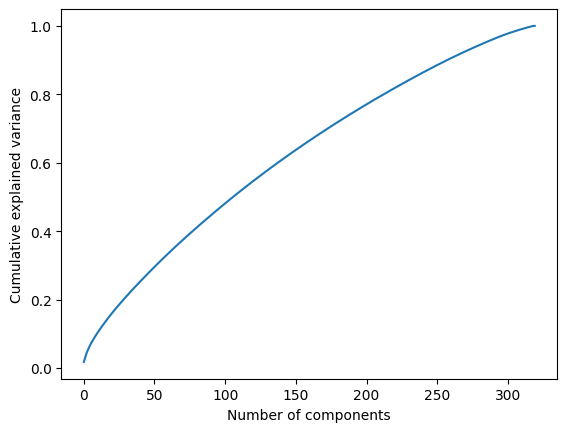

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###--UNSUPERVISED LEARNING--##
#Exploring optimal # of components for PCA Dimensionality Reduction
'''
https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6
'''
pca = PCA(n_components=320)
pca.fit(X_train)

#Using PCA cum. explained variance to measure the usefulness of principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
from sklearn.decomposition import PCA
#PCA Dimensionality Reduction on data
pca = PCA(n_components=300)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

In [ ]:
print(X_train_transformed.shape)
print(X_test_transformed.shape)

(320, 300)
(80, 300)


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

SVM_model = SVC()
SVM_model.fit(X_train, y_train)
SVM_y_preds = SVM_model.predict(X_test)

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(X_train_transformed, y_train)
KNN_y_preds = KNN_model.predict(X_test_transformed)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, SVM_y_preds, labels=["Benign", "Normal", "Invasive", "Insitu"]))
print(classification_report(y_test, KNN_y_preds, labels=["Benign", "Normal", "Invasive", "Insitu"]))